# Mall Customer Segmentation

# Summary

* Data Analysis
* Data Visualisation

Clustering :
* KMeans
* DBScan
* Agglomerative Clustering

# Library

In [3]:
# Data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Machine Learning library
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Other
from time import time
from warnings import filterwarnings
filterwarnings('ignore')

# Data 

In [14]:
data = pd.read_csv("./resources/mall_customers.csv", encoding='utf-8', sep=',')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Missing Values

In [29]:
print("Percentage of missing values on each column :\n")
print(((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False))

Percentage of missing values on each column :

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


## Boxplots

In [28]:
boxplots_after = px.box(data,
                         y=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
                         labels={'circonference_cm': 'Circumference in centimeters',
                                 'hauteur_m': 'Height in meters'
                                 },
                         title='Circumference and height boxplot before cleanup',
                         log_y=True)
boxplots_after.show()

## Pairplot

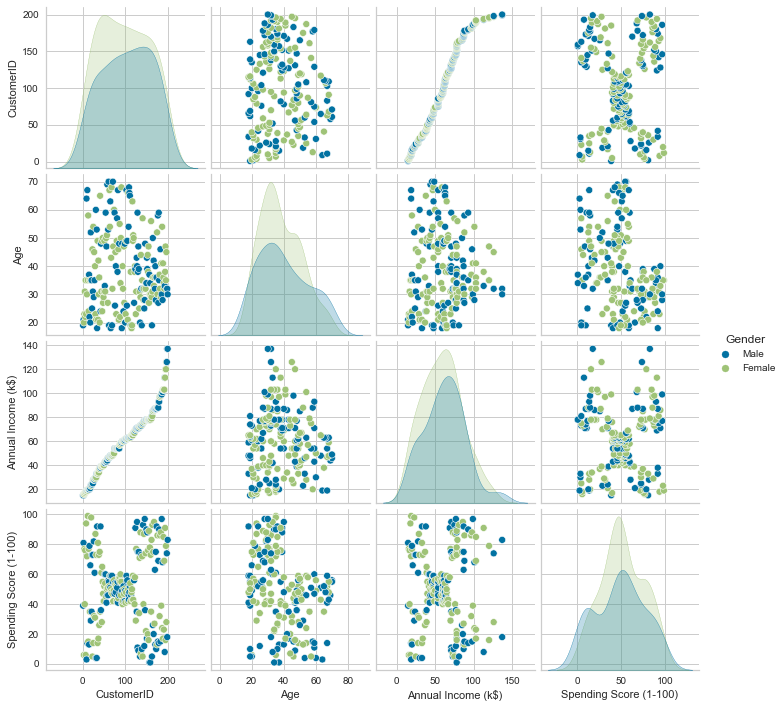

In [7]:
sns.pairplot(data, hue="Gender")
plt.show()

## Correlation box

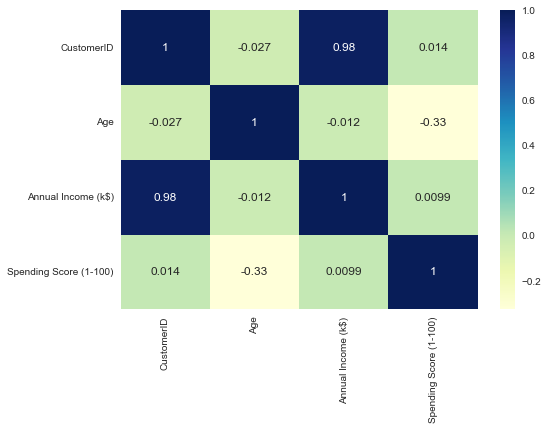

In [5]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Gender Distribution

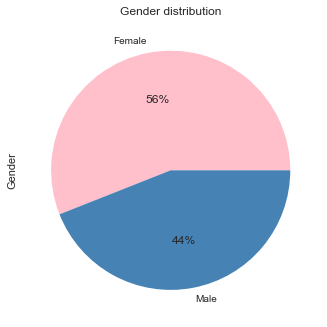

In [22]:
gender_group = data.groupby(['Gender'])
gender_group.size().plot(kind='pie', 
                         ylabel='Gender', 
                         colors=['pink', 'steelblue', 'pink'], 
                         title='Gender distribution',
                         autopct='%.0f%%')
plt.show()

# Clustering

## Label Encoding

In [ ]:
le = LabelEncoder()
le_count = 0

for col in app_train:
    if data[col].dtype == 'object' or data[col].dtype == 'string':
        le.fit(data[col])
        data[col] = le.transform(data[col])
        le_count += 1
        print(col)
data.reset_index()
print('%d columns were label encoded.' % le_count)